In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [3]:
train=pd.read_csv('train_v9rqX0R.csv')
test=pd.read_csv('test_AbJTz2l.csv')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

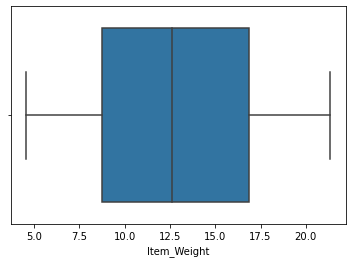

In [7]:
sns.boxplot(train['Item_Weight'])
plt.show()

In [8]:
train['Item_Weight']=train['Item_Weight'].fillna(np.mean(train['Item_Weight']))
test['Item_Weight']=test['Item_Weight'].fillna(np.mean(test['Item_Weight']))

In [9]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [11]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
df_cat=train.select_dtypes(include=object)

In [13]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Low Fat'])
test['Item_Fat_Content']=test['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Low Fat'])

In [15]:
train['Item_Fat_Content']=train['Item_Fat_Content'].astype(str)
test['Item_Fat_Content']=test['Item_Fat_Content'].astype(str)

In [16]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


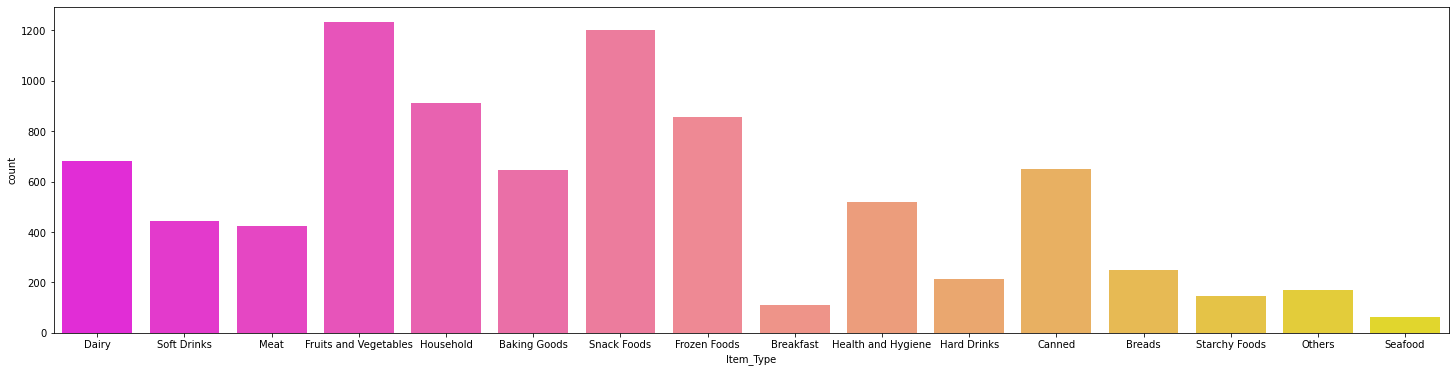

In [17]:
plt.figure(figsize=(25,6))
sns.countplot('Item_Type',data=train,palette='spring')
plt.show()

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

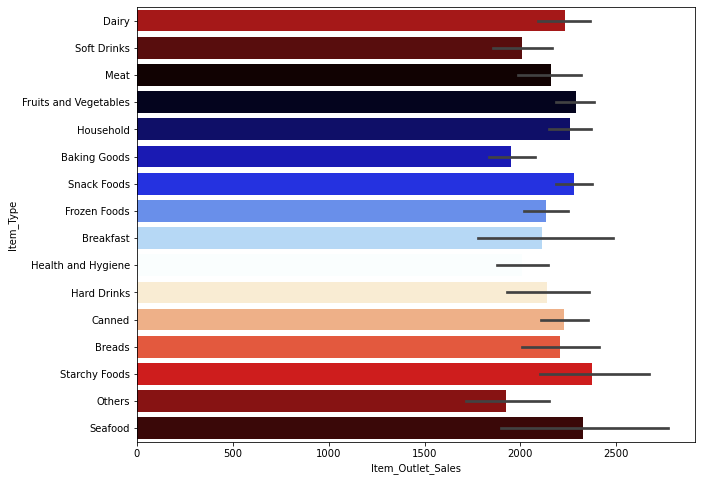

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='flag')

In [19]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [21]:
train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
train['Outlet'] = le.fit_transform(train['Outlet_Identifier'])

In [30]:
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])
train = pd.get_dummies(train, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [31]:
test['Outlet'] = le.fit_transform(test['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    test[i] = le.fit_transform(test[i])
    
#One Hot Coding:
test = pd.get_dummies(test, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [ ]:
train.columns

In [29]:
train['Outlet_Establishment_Year']=train['Outlet_Establishment_Year'].astype('int64')

In [ ]:
train.dtypes

In [28]:
train['Item_Weight']=train['Item_Weight'].astype('int64')
test['Item_Weight']=test['Item_Weight'].astype('int64')

In [25]:
train['Item_Type_Combined']=train['Item_Identifier'].apply(lambda x : x[0:2])
train['Item_Type_Combined']=train['Item_Type_Combined'].map({'FD':'Food','DR':'Drink','NC':'Non-Consumable'})

In [26]:
test['Item_Type_Combined']=test['Item_Identifier'].apply(lambda x : x[0:2])
test['Item_Type_Combined']=test['Item_Type_Combined'].map({'FD':'Food','DR':'Drink','NC':'Non-Consumable'})

In [27]:
train['Outlet_Establishment_Year']=2021-train['Outlet_Establishment_Year']
test['Outlet_Establishment_Year']=2021-test['Outlet_Establishment_Year']

In [ ]:
var_mod = train.select_dtypes(include='object').columns

In [ ]:
var_mod

In [32]:
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
vart_mod = test.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
for i in vart_mod:
    test[i] = le.fit_transform(test[i])

In [ ]:
train.head()

In [33]:
train = train.select_dtypes(exclude='object')
test = test.select_dtypes(exclude='object')

In [34]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2',
       'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1',
       'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9'],
      dtype='object')

In [35]:
X=train.drop(['Item_Outlet_Sales'],axis=1)

In [36]:
y=train['Item_Outlet_Sales']

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [38]:
linearRef=LinearRegression()

In [39]:
linearRef.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred=linearRef.predict(x_test)

In [41]:
print('Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_pred,y_test))) #1245.98053419219 ,1182.0356857276263,1115.54

Mean Squared Error 1115.8180270597907


In [42]:
metrics.r2_score(y_pred,y_test) # 0.01531,0.194

0.19417504696153742

In [43]:
vif = pd.DataFrame()
vif["Features"] = train.columns
vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
# print the VIF
print(vif)

                     Features       VIF
0             Item_Identifier  2.658427
1                 Item_Weight  1.008216
2             Item_Visibility  1.097700
3                   Item_Type  1.132490
4                    Item_MRP  1.744857
5           Outlet_Identifier       inf
6   Outlet_Establishment_Year       inf
7           Item_Outlet_Sales  2.291475
8          Item_Fat_Content_0       inf
9          Item_Fat_Content_1       inf
10     Outlet_Location_Type_0       inf
11     Outlet_Location_Type_1       inf
12     Outlet_Location_Type_2       inf
13              Outlet_Size_0       inf
14              Outlet_Size_1       inf
15              Outlet_Size_2       inf
16              Outlet_Type_0       inf
17              Outlet_Type_1       inf
18              Outlet_Type_2       inf
19              Outlet_Type_3       inf
20       Item_Type_Combined_0       inf
21       Item_Type_Combined_1       inf
22       Item_Type_Combined_2       inf
23                   Outlet_0       inf


In [44]:
vif = pd.DataFrame()
vif["Features"] = train.columns
vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
# print the VIF
print(vif)

                     Features       VIF
0             Item_Identifier  2.658427
1                 Item_Weight  1.008216
2             Item_Visibility  1.097700
3                   Item_Type  1.132490
4                    Item_MRP  1.744857
5           Outlet_Identifier       inf
6   Outlet_Establishment_Year       inf
7           Item_Outlet_Sales  2.291475
8          Item_Fat_Content_0       inf
9          Item_Fat_Content_1       inf
10     Outlet_Location_Type_0       inf
11     Outlet_Location_Type_1       inf
12     Outlet_Location_Type_2       inf
13              Outlet_Size_0       inf
14              Outlet_Size_1       inf
15              Outlet_Size_2       inf
16              Outlet_Type_0       inf
17              Outlet_Type_1       inf
18              Outlet_Type_2       inf
19              Outlet_Type_3       inf
20       Item_Type_Combined_0       inf
21       Item_Type_Combined_1       inf
22       Item_Type_Combined_2       inf
23                   Outlet_0       inf


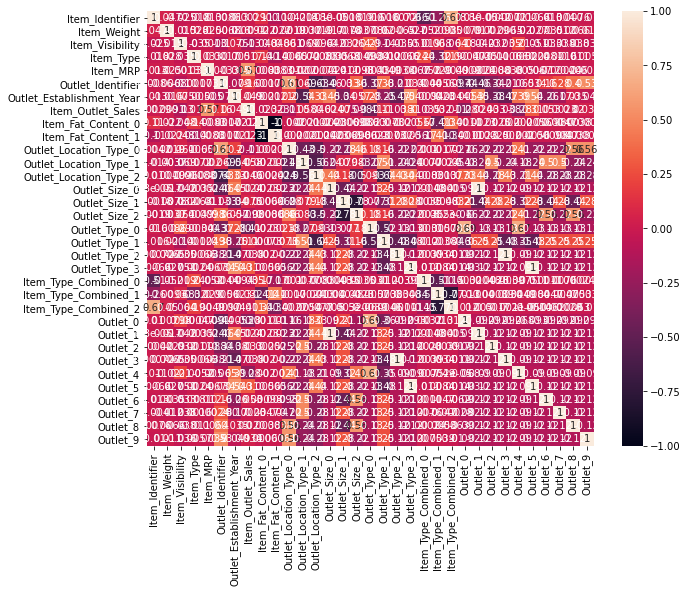

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [ ]:
sns.barplot(train['Outlet_Establishment_Year'],train['Item_Outlet_Sales'])

In [46]:
scores = cross_val_score(estimator = LinearRegression(),X = x_train,y = y_train,cv =5 ,scoring = 'r2',)
print('All scores: ', scores)   
print("\nMinimum score obtained: ", round(min(scores), 4))  
print("Maximum score obtained: ", round(max(scores), 4))    
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.55472168 0.55992366 0.58913477 0.55853482 0.53465983]

Minimum score obtained:  0.5347
Maximum score obtained:  0.5891
Average score obtained:  0.5594


In [47]:
scores = cross_val_score(estimator = LinearRegression(),X = x_train,y = y_train,cv =5 ,scoring = 'r2',)
print('All scores: ', scores)   
print("\nMinimum score obtained: ", round(min(scores), 4))  
print("Maximum score obtained: ", round(max(scores), 4))    
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.55472168 0.55992366 0.58913477 0.55853482 0.53465983]

Minimum score obtained:  0.5347
Maximum score obtained:  0.5891
Average score obtained:  0.5594


In [48]:
tuned_paramaters = [{'alpha':[7, 8, 9, 10, 11]}]
ridge = Ridge()
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 5)
ridge_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression:', ridge_grid.best_params_)

Best parameters for Ridge Regression: {'alpha': 11}


In [ ]:
ridge = Ridge(alpha = 11)
ridge.fit(x_train,y_train)
ridge_pred=ridge.predict(x_test)
print('RMSE :',np.sqrt(metrics.mean_squared_error(ridge_pred,y_test)))
print('R-square:',metrics.r2_score(ridge_pred,y_test))

In [ ]:
lasso=Lasso(alpha = 7)
lasso.fit(x_train,y_train)
lasso_pred=ridge.predict(x_test)
print('RMSE :',np.sqrt(metrics.mean_squared_error(lasso_pred,y_test)))
print('R-square:',metrics.r2_score(lasso_pred,y_test))

In [ ]:
features= x_train.columns
plt.figure(figsize=(8,5))
sns.barplot(lasso.coef_,features)

In [ ]:
submission = pd.read_csv('sample_submission_8RXa3c6.csv')
final_predictions = ridge.predict(test)
submission['Item_Outlet_Sales'] = final_predictions
#only positive predictions for the target variable
submission['Item_Outlet_Sales'] = submission['Item_Outlet_Sales'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)

In [52]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [53]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor']

rmse_list = []

In [54]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor']

rmse_list = []

In [57]:
for name in algos:
    model = name
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    MSE= metrics.mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)

In [58]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list})

In [59]:
evaluation

,Model,RMSE
0,Linear Regression,1115.818027
1,Ridge Regression,1115.805756
2,Lasso Regression,1115.705480
3,K Neighbors Regressor,1517.330585
4,Decision Tree Regressor,1526.407836
